## Data from Kaggle
## URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

### Metadata

#### Row ID => Unique ID for each row.
#### Order ID => Unique Order ID for each Order.
#### Order Date => Order Date of the product.
#### Ship Date => Shipping Date of the Product.
#### Ship Mode=> Shipping Mode specified by the Customer.
#### Customer ID => Unique ID to identify each Customer.
#### Customer Name => Name of the Customer.
#### Segment => The segment where the Customer belongs.
#### Country => Country of residence of the Customer.
#### City => City of residence of of the Customer.
#### State => State of residence of the Customer.
#### Postal Code => Postal Code of every Customer.
#### Region => Region where the Customer belong.
#### Product ID => Unique ID of the Product.
#### Category => Category of the product ordered.
#### Sub-Category => Sub-Category of the product ordered.
#### Product Name => Name of the Product
#### Sales => Sales of the Product.
#### Quantity => Quantity of the Product.
#### Discount => Discount provided.
#### Profit => Profit/Loss incurred.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,8)})
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('Superstore.csv', encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## check duplicated

In [4]:
df.duplicated().sum()

0

##  *Univariate Analysis

In [5]:
df.drop('Row ID',axis=1, inplace=True)

In [6]:
df['Order ID'].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64

### Number of orders

In [7]:
len(df['Order ID'].value_counts())

5009

In [8]:
df['Order Date'].value_counts()

9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
2/25/2016      1
10/25/2016     1
2/21/2014      1
10/18/2016     1
1/21/2014      1
Name: Order Date, Length: 1237, dtype: int64

### Number of request Order days

In [9]:
len(df['Order Date'].value_counts())

1237

In [10]:
df['Ship Date'].value_counts()

12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
              ..
3/4/2014       1
2/11/2017      1
8/7/2016       1
4/8/2017       1
6/18/2015      1
Name: Ship Date, Length: 1334, dtype: int64

### Number of Shipping days

In [11]:
len(df['Ship Date'].value_counts())

1334

In [12]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

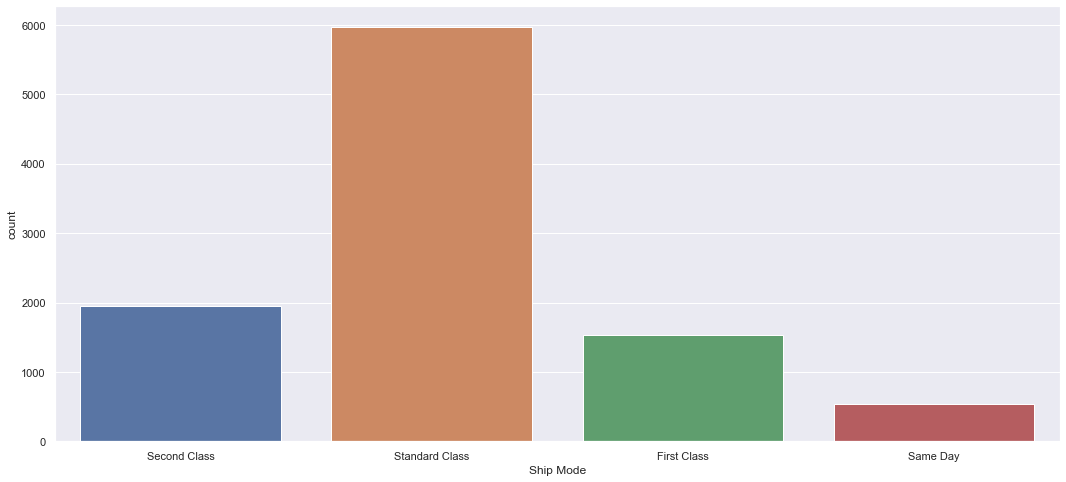

In [13]:
sns.countplot(data=df, x='Ship Mode')

In [14]:
df['Customer ID'].value_counts()

WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64

### number of customers

In [15]:
len(df['Customer ID'].value_counts())

793

### drop one of Customer ID and Customer Name 

In [16]:
df.drop('Customer ID', axis= 1, inplace=True)

In [17]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

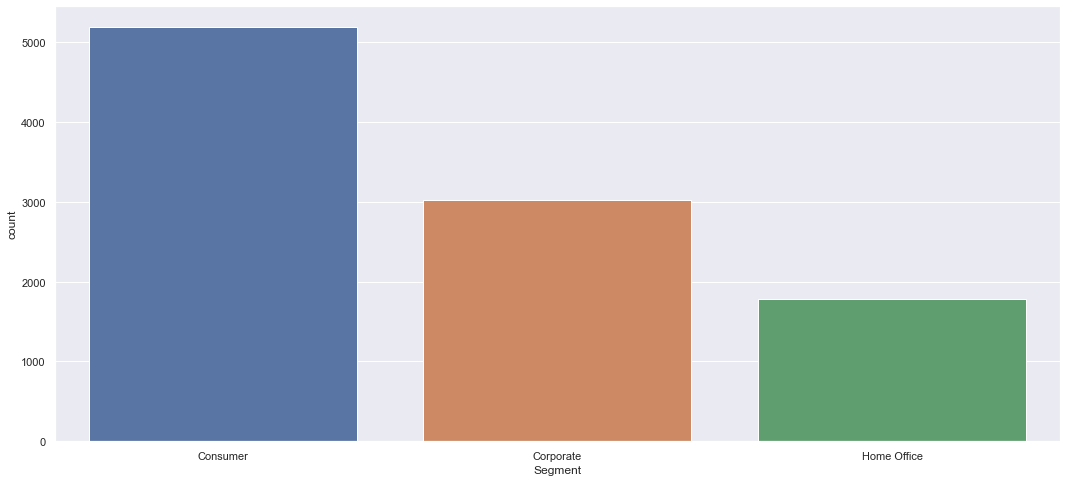

In [18]:
sns.countplot(data=df, x='Segment')

In [19]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

### Drop Country is not necessary

In [20]:
df.drop('Country', axis=1, inplace=True)

In [21]:
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

<AxesSubplot:xlabel='count', ylabel='City'>

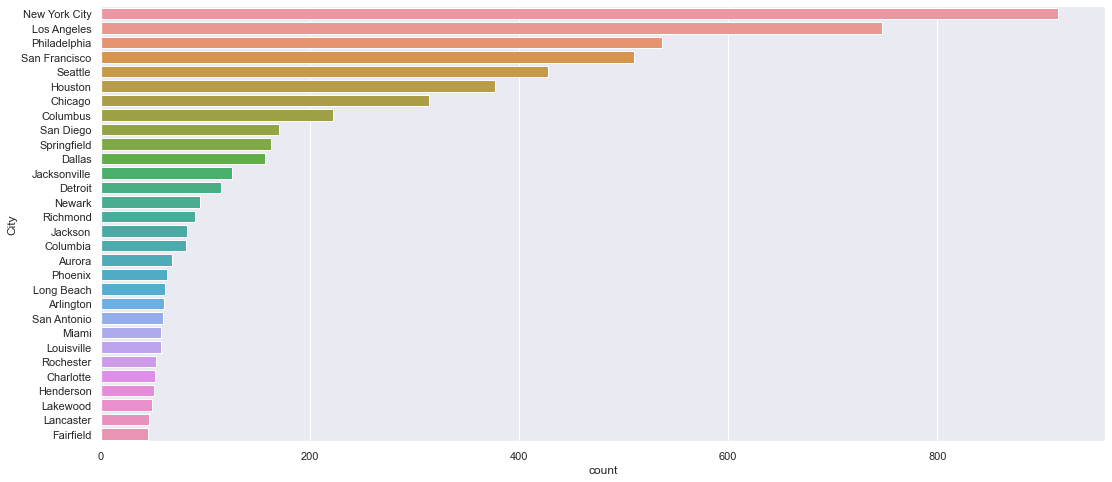

In [22]:
sns.countplot(y=df['City'], order=pd.value_counts(df['City']).iloc[:30].index)

In [23]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

### number of states

In [24]:
len(df['State'].value_counts())

49

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Pennsylvania'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Florida'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'North Carolina'),
  Text(10, 0, 'Arizona'),
  Text(11, 0, 'Virginia'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Tennessee'),
  Text(14, 0, 'Colorado'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Massachusetts'),
  Text(18, 0, 'New Jersey'),
  Text(19, 0, 'Oregon'),
  Text(20, 0, 'Wisconsin'),
  Text(21, 0, 'Maryland'),
  Text(22, 0, 'Delaware'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Connecticut'),
  Text(25, 0, 'Oklahoma'),
  Text(26, 0, 'Missouri'),
  Text(27, 0, 'Alabama'),
  Text(28, 0, 'Arka

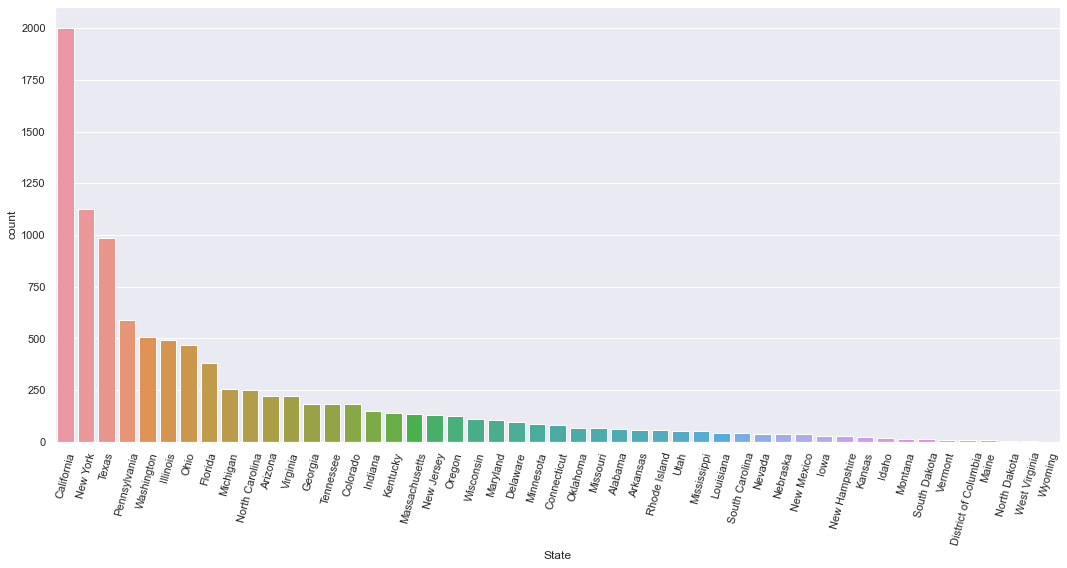

In [25]:
sns.countplot(x=df['State'], order=pd.value_counts(df['State']).index)
plt.xticks(rotation=75)

### drop postal code

In [26]:
df.drop('Postal Code', axis=1, inplace=True)

In [27]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

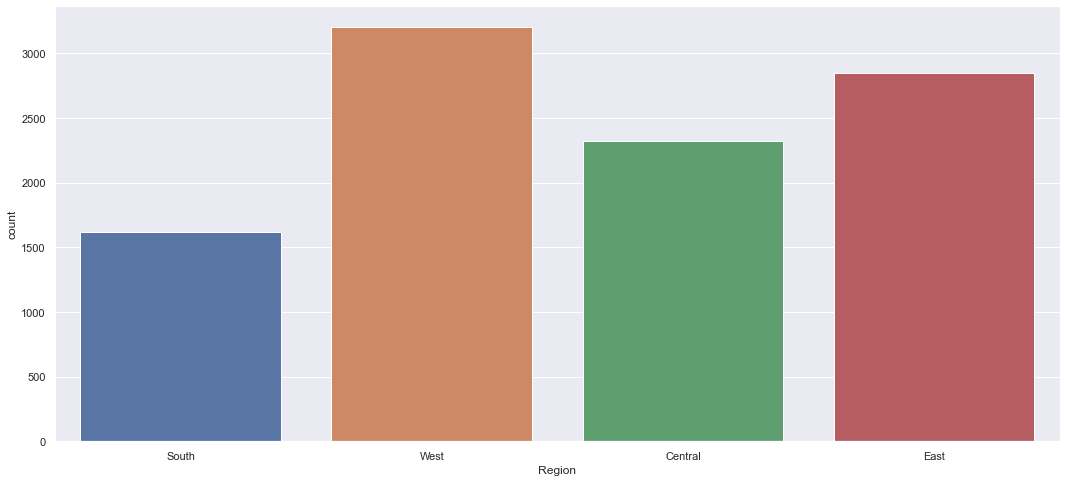

In [28]:
sns.countplot(data=df, x='Region')

### drop Product ID

In [29]:
df.drop('Product ID', axis=1, inplace=True)

In [30]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

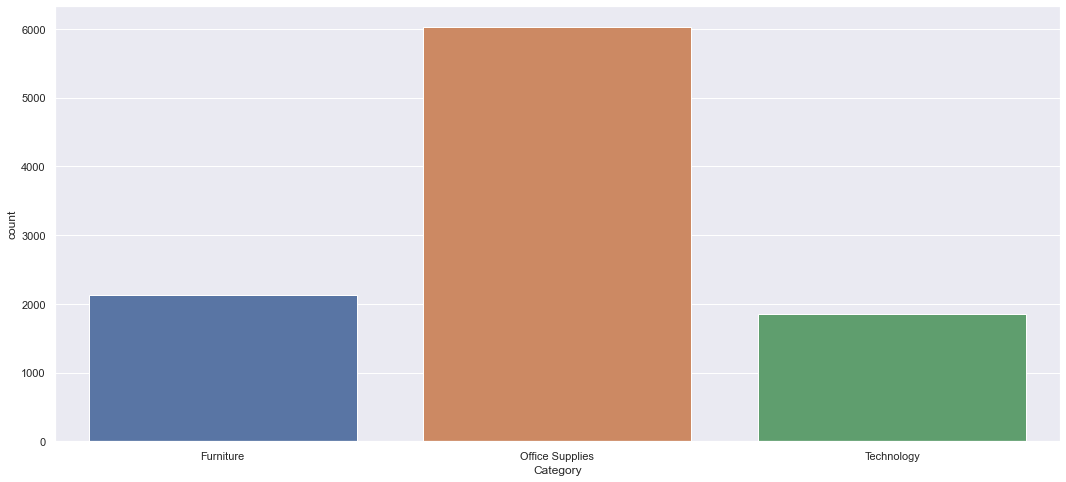

In [31]:
sns.countplot(data=df, x='Category')

In [32]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

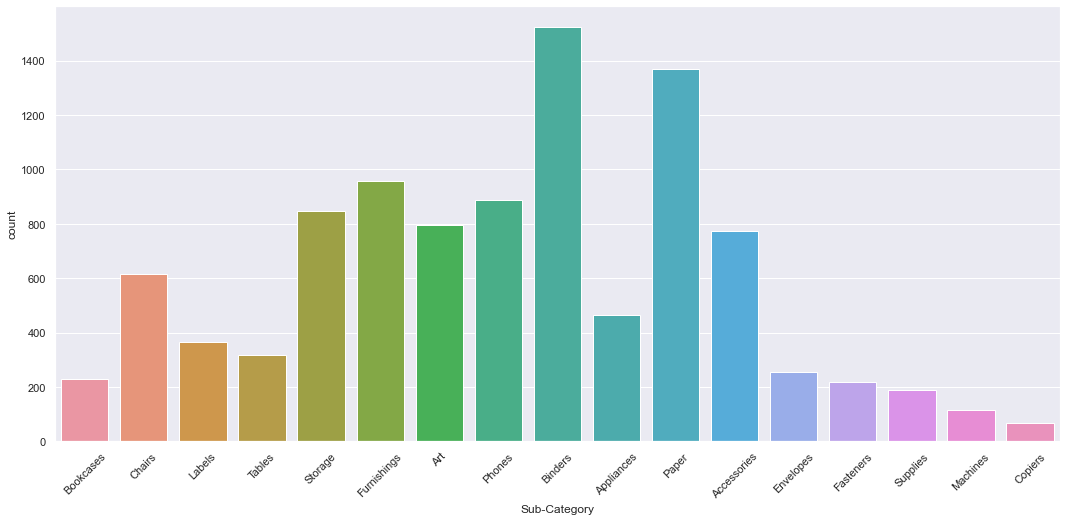

In [33]:
sns.countplot(data=df, x='Sub-Category')
plt.xticks(rotation=45)

### Sales have high variance in fourth quartile with right skew

In [34]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

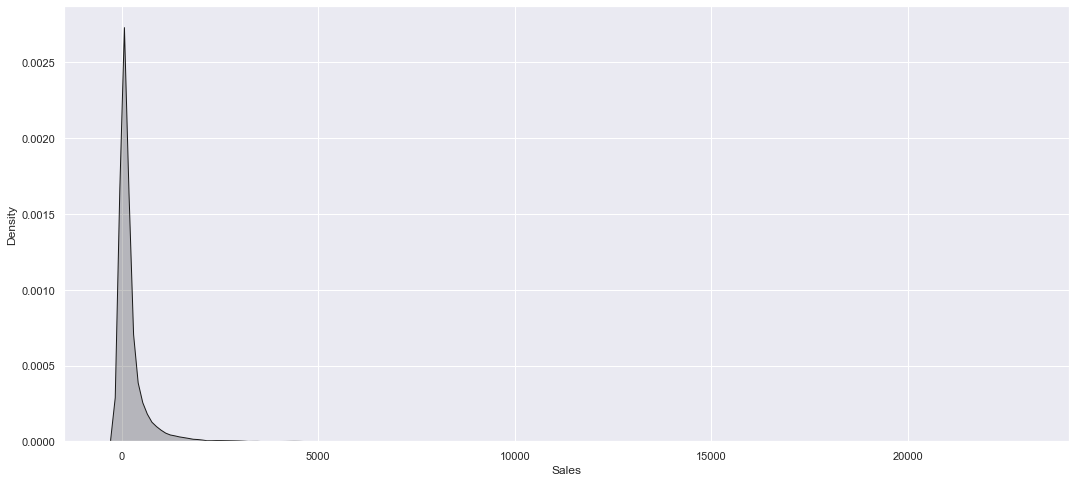

In [35]:
sns.kdeplot(data=df, x= 'Sales', shade= any, color='k')

<AxesSubplot:ylabel='Sales'>

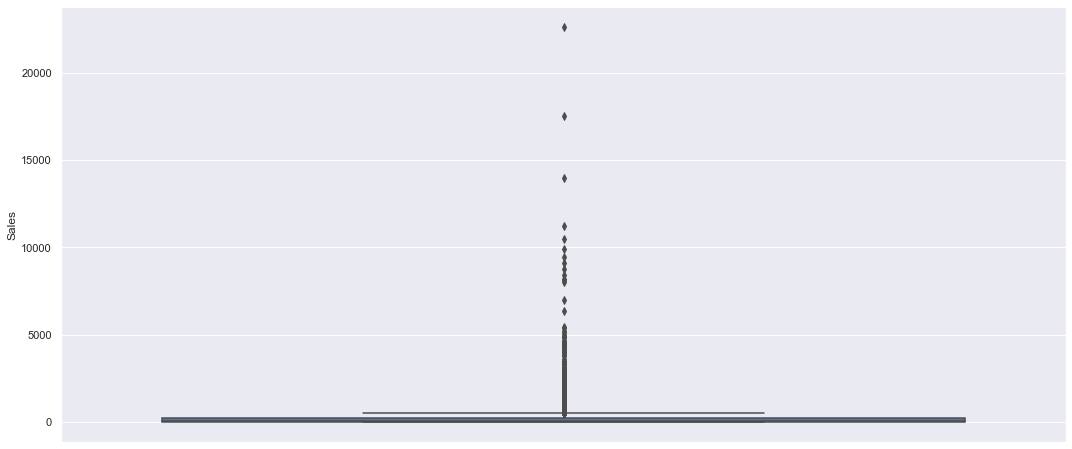

In [36]:
sns.boxplot(data=df, y='Sales')

In [37]:
df['Quantity'].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

<AxesSubplot:ylabel='Quantity'>

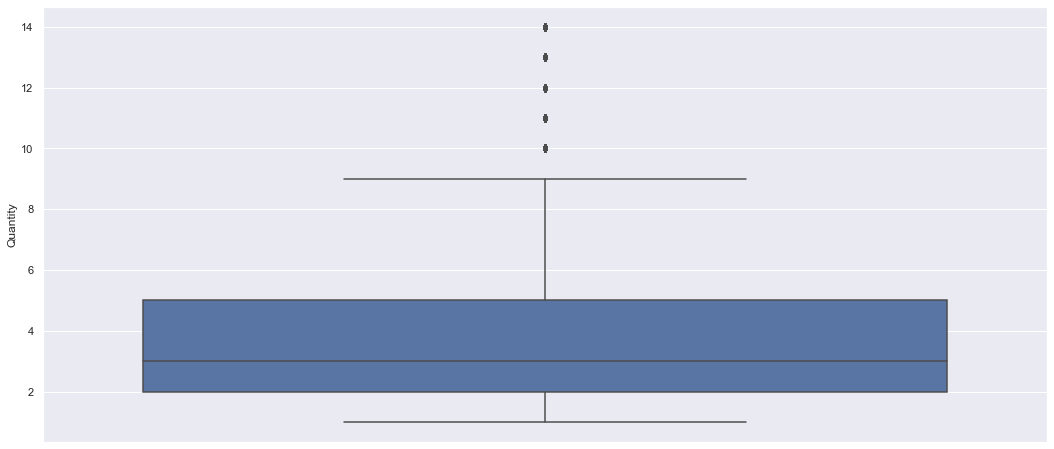

In [38]:
sns.boxplot(data=df, y='Quantity')

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

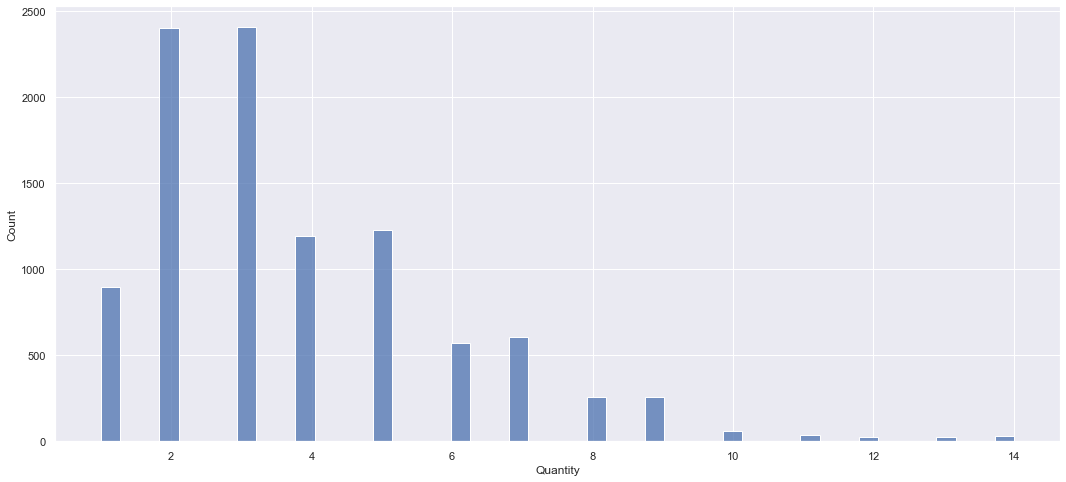

In [39]:
sns.histplot(data=df, x= 'Quantity')

In [40]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

<AxesSubplot:ylabel='Discount'>

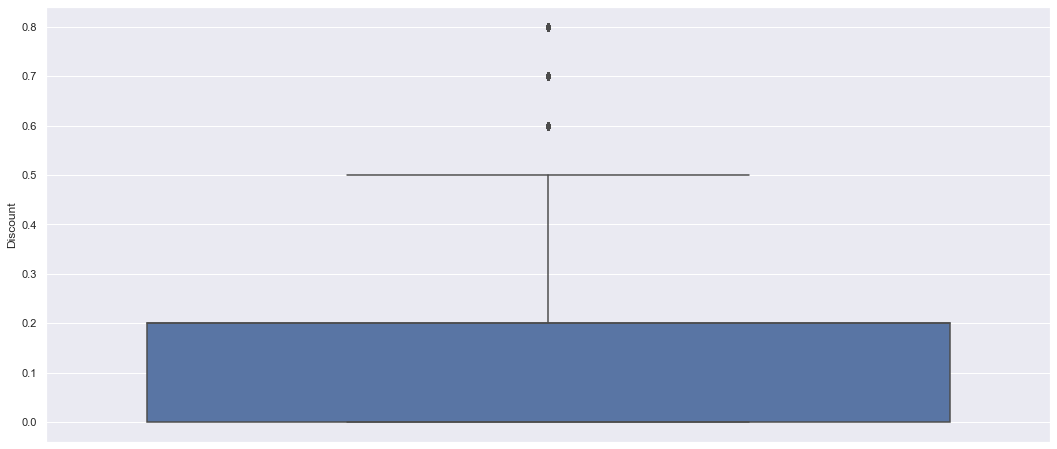

In [41]:
sns.boxplot(data=df, y='Discount')

<AxesSubplot:xlabel='Discount', ylabel='Count'>

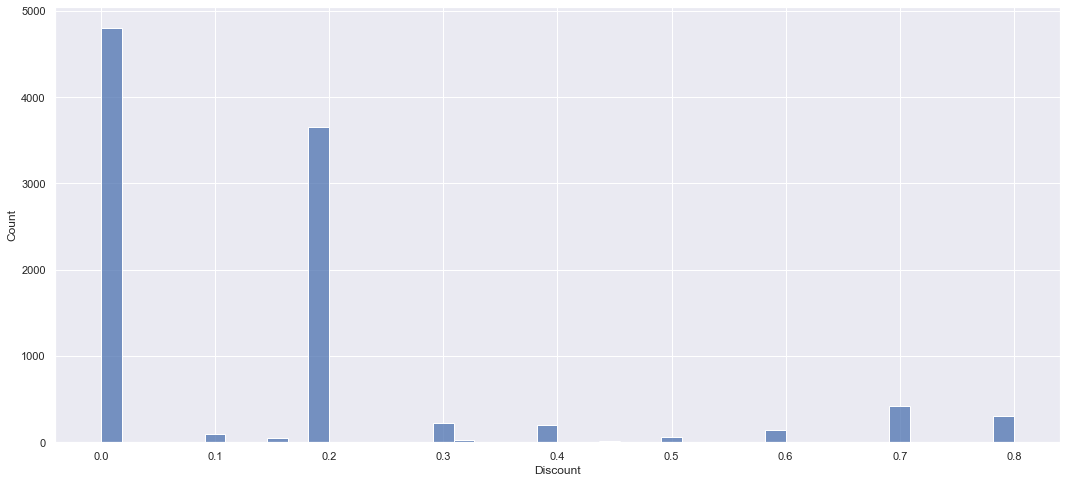

In [42]:
sns.histplot(data=df, x= 'Discount')

### Profit have symmetric distribution 

In [43]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Profit'>

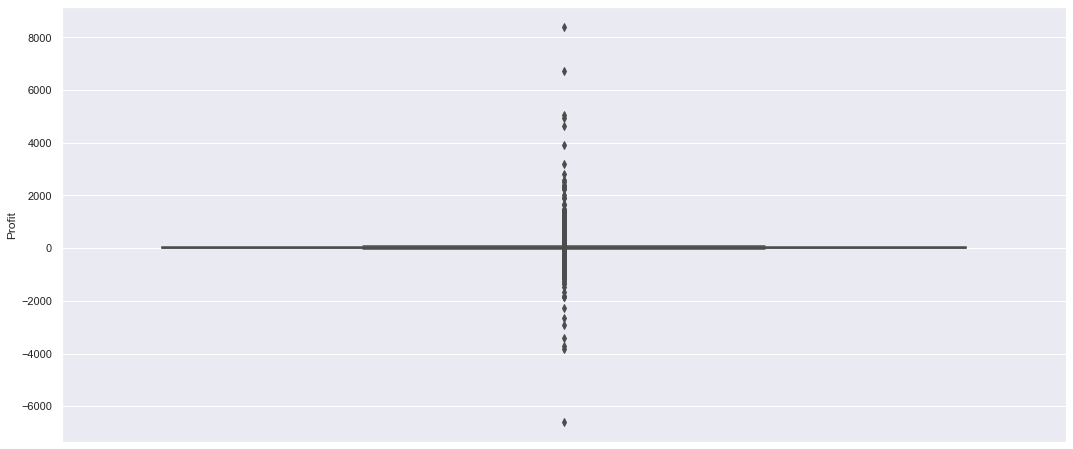

In [44]:
sns.boxplot(data=df, y='Profit')

<AxesSubplot:xlabel='Profit', ylabel='Density'>

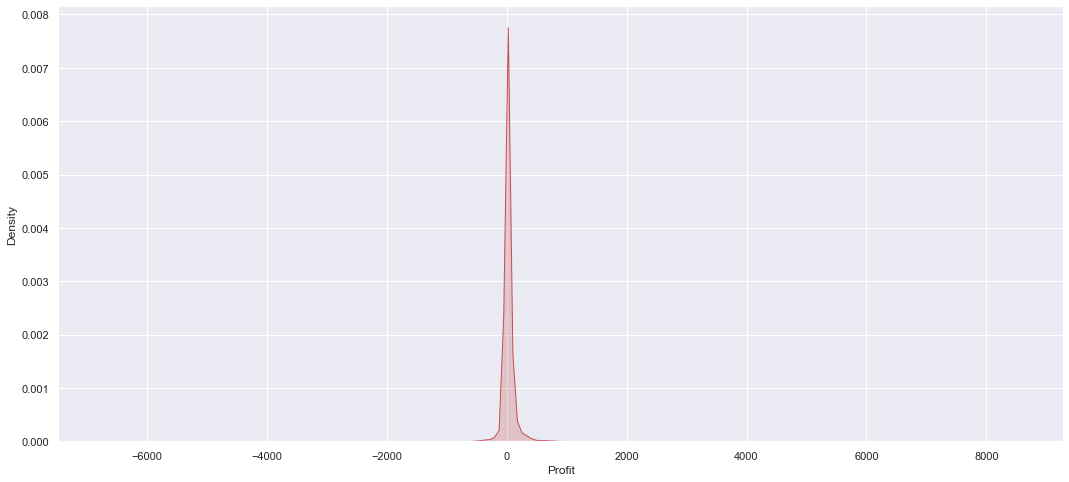

In [45]:
sns.kdeplot(data=df, x='Profit', shade=any, color='r')

## *Feature Engineering

### edit Date

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [47]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

### extract year 

In [48]:
Year = df['Order Date'].dt.year
df.insert(0, 'Year', Year)
df['Year'] = df['Year'].apply(lambda x : str(x))

### extract month

In [49]:
month = df['Order Date'].dt.month

In [50]:
df.insert(1, 'Month', month)

### extract Total Price before Discount

In [51]:
def calc(x):
    t = x['Sales']/(1-(x['Discount']))
    return t

total = df.apply(calc, axis=1)
df.insert(14, 'Total before Discount', total)

## Analytical questions

In [52]:
df.corr()

,Month,Total before Discount,Sales,Quantity,Discount,Profit
Month,1.000000,-0.000885,-0.000625,0.023355,-0.004935,-0.000502
Total before Discount,-0.000885,1.000000,0.932939,0.180016,0.066966,0.181508
Sales,-0.000625,0.932939,1.000000,0.200795,-0.028190,0.479064
Quantity,0.023355,0.180016,0.200795,1.000000,0.008623,0.066253
Discount,-0.004935,0.066966,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.000502,0.181508,0.479064,0.066253,-0.219487,1.000000


### what's the relation between Sales and Profit ?

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

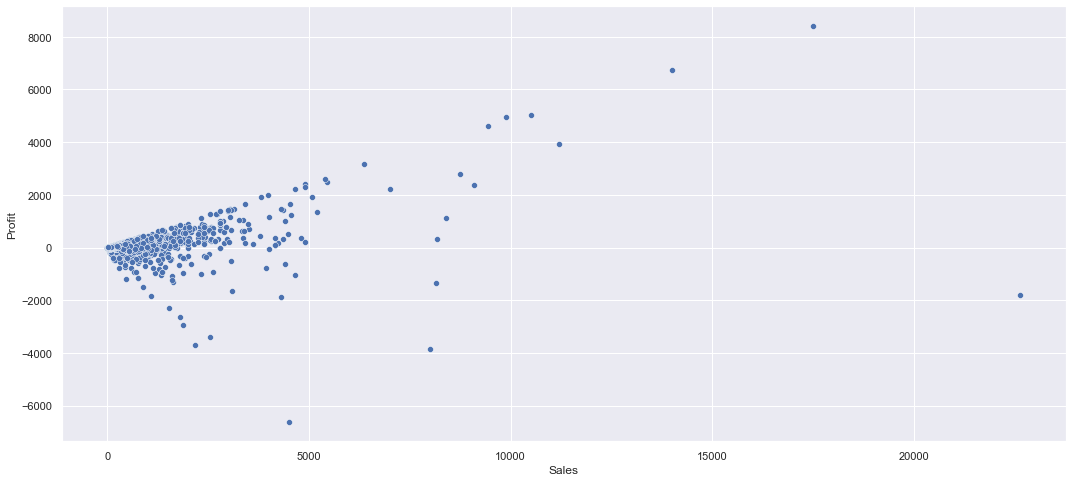

In [53]:
sns.scatterplot(data=df, x='Sales', y='Profit')

### what's the total Sales and Profit for each month along Years ?

In [54]:
df.pivot_table(df, index=['Year'], columns=df['Month'], aggfunc={'Sales' : np.sum})

Sales                                                              \
Month          1           2           3           4           5           6    
Year                                                                            
2014   14236.8950   4519.8920  55691.0090  28295.3450  23648.2870  34595.1276   
2015   18174.0756  11951.4110  38726.2520  34195.2085  30131.6865  24797.2920   
2016   18542.4910  22978.8150  51715.8750  38750.0390  56987.7280  40344.5340   
2017   43971.3740  20301.1334  58872.3528  36521.5361  44261.1102  52981.7257   

                                                                               
Month         7           8           9           10           11          12  
Year                                                                           
2014   33946.393  27909.4685  81777.3508  31453.3930   78628.7167  69545.6205  
2015   28765.325  36898.3322  64595.9180  31404.9235   75972.5635  74919.5212  
2016   39261.963  31115.3743  73410.0249  59687.7450   79411.9658  96999.0430  
2017   45264.416  63120.8880  87866.6520  77776.9232  118447.8250  83829.3188

Text(0, 0.5, 'Sales')

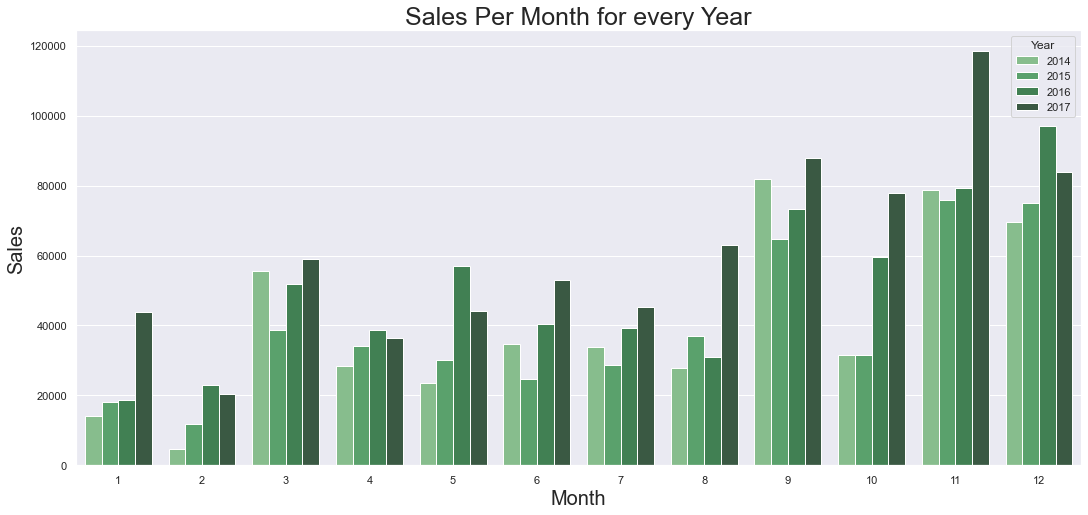

In [55]:
sns.barplot(x=df['Month'], y=df['Sales'], hue=df['Year'], hue_order=['2014', '2015', '2016', '2017'], estimator=sum, ci=None,palette='Greens_d')

plt.title('Sales Per Month for every Year', fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Month', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Sales', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

Text(0, 0.5, 'Sales')

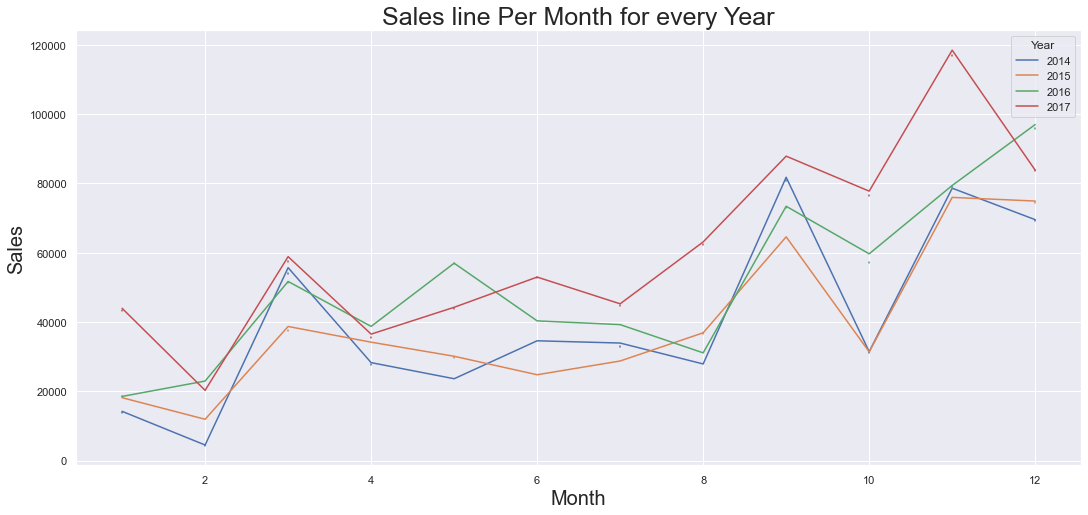

In [56]:
sns.lineplot(x=df['Month'], y=df['Sales'], hue=df['Year'], hue_order=['2014', '2015', '2016', '2017'], ci=True, err_style='bars', estimator=sum)

plt.title('Sales line Per Month for every Year', fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Month', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Sales', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

In [57]:
df.pivot_table(df, index=['Year'], columns=df['Month'], aggfunc={'Profit' : np.sum})

Profit                                                          \
Month         1          2           3          4          5          6    
Year                                                                       
2014   2450.1907   862.3084    498.7299  3488.8352  2738.7096  4976.5244   
2015  -3281.0070  2813.8508   9732.0978  4187.4962  4667.8690  3335.5572   
2016   2824.8233  5004.5795   3611.9680  2977.8149  8662.1464  4750.3781   
2017   7140.4391  1613.8720  14751.8915   933.2900  6342.5828  8223.3357   

                                                                             
Month         7          8           9           10          11          12  
Year                                                                         
2014   -841.4826  5318.1050   8328.0994   3448.2573   9292.1269   8983.5699  
2015   3288.6483  5355.8084   8209.1627   2817.3660  12474.7884   8016.9659  
2016   4432.8779  2062.0693   9328.6576  16243.1425   4011.4075  17885.3093  
2017   6952.6212  9040.9557  10991.5556   9275.2755   9690.1037   8483.3468

Text(0, 0.5, 'Profit')

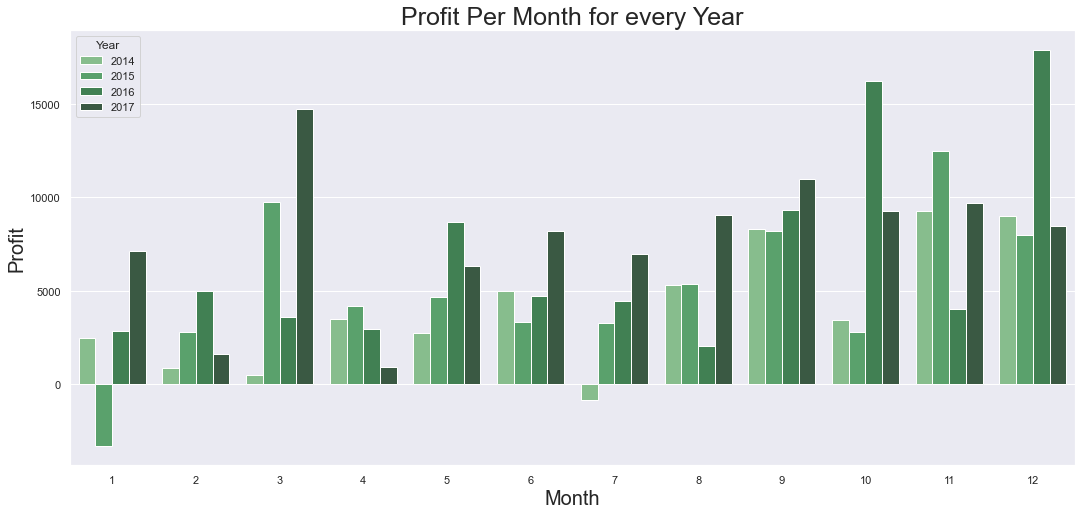

In [58]:
sns.barplot(x=df['Month'], y=df['Profit'], hue=df['Year'], hue_order=['2014', '2015', '2016', '2017'], estimator=sum, ci=None,palette='Greens_d')

plt.title('Profit Per Month for every Year', fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Month', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Profit', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

Text(0, 0.5, 'Profit')

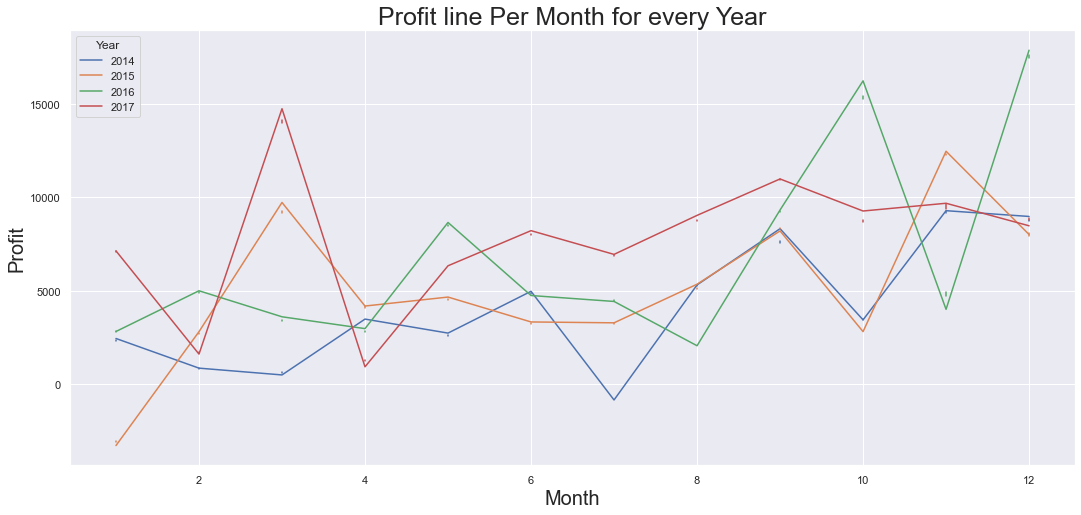

In [59]:
sns.lineplot(x=df['Month'], y=df['Profit'], hue=df['Year'], hue_order=['2014', '2015', '2016', '2017'], ci=True, err_style='bars', estimator=sum)

plt.title('Profit line Per Month for every Year', fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Month', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Profit', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

### what's the amount of Discount every month ?

<AxesSubplot:xlabel='Month', ylabel='count'>

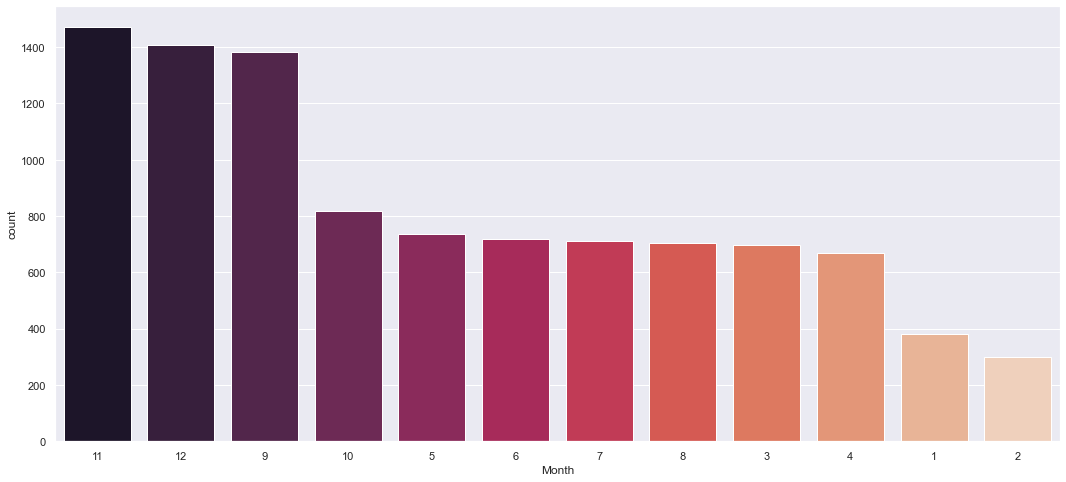

In [60]:
sns.countplot(data=df, x='Month', order=pd.value_counts(df['Month']).index, palette='rocket')

<AxesSubplot:xlabel='Month', ylabel='count'>

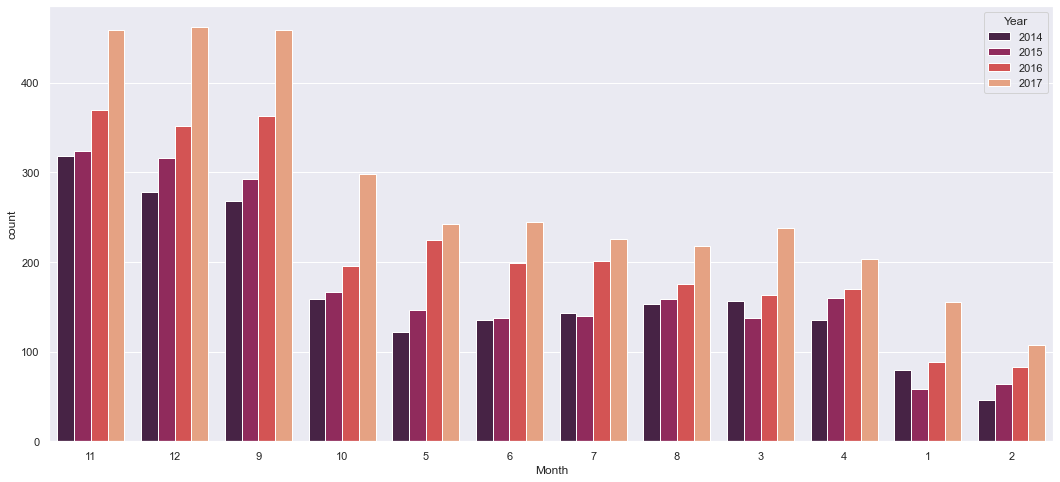

In [61]:
sns.countplot(data=df, x='Month', order=pd.value_counts(df['Month']).index, hue='Year', hue_order=['2014', '2015', '2016', '2017'], palette='rocket')

<AxesSubplot:xlabel='Month', ylabel='Discount'>

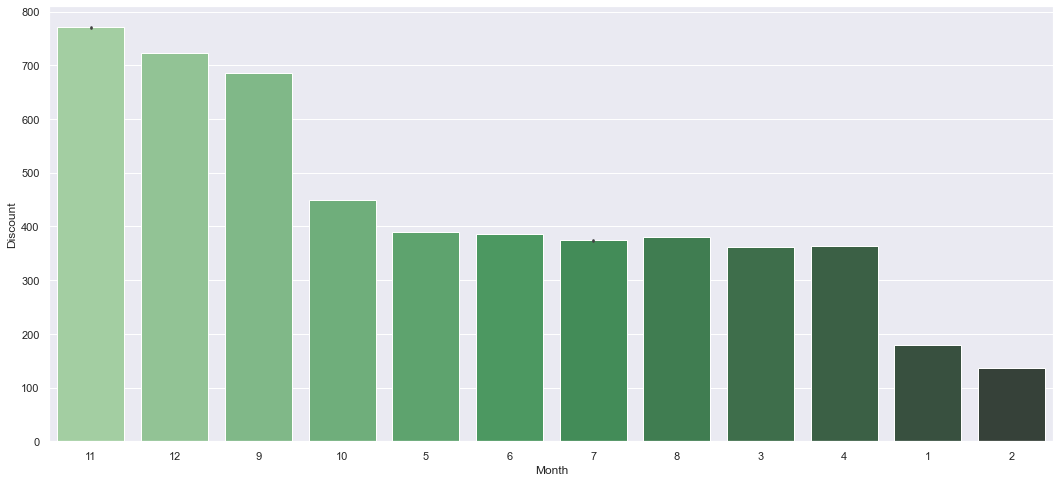

In [62]:
sns.barplot(data=df, x='Month', y='Discount', ci=True, estimator=np.count_nonzero, order=pd.value_counts(df['Month']).index, palette='Greens_d')

<AxesSubplot:xlabel='Month', ylabel='Discount'>

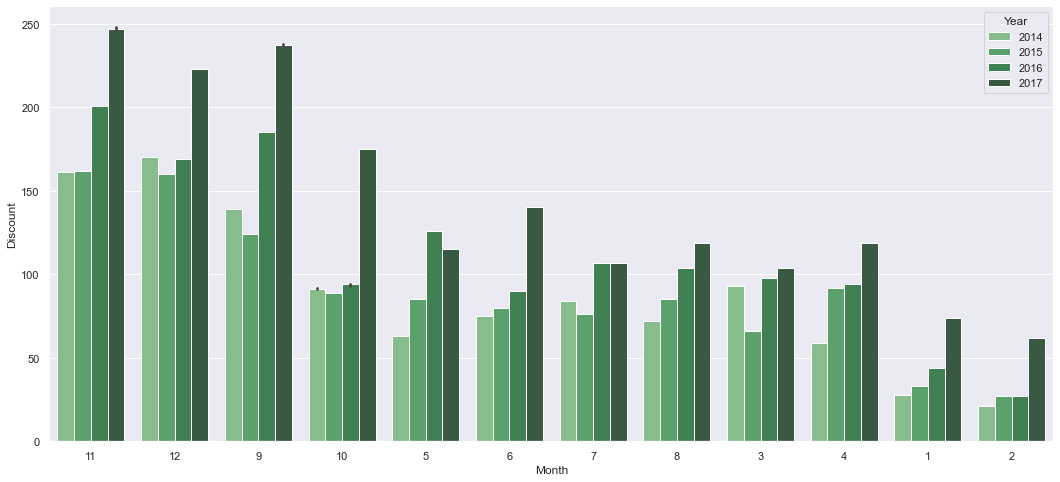

In [63]:
sns.barplot(data=df, x='Month', y='Discount', ci=True, estimator=np.count_nonzero, hue='Year', hue_order=['2014', '2015', '2016', '2017'], order=pd.value_counts(df['Month']).index, palette='Greens_d')

<AxesSubplot:xlabel='Month', ylabel='Discount'>

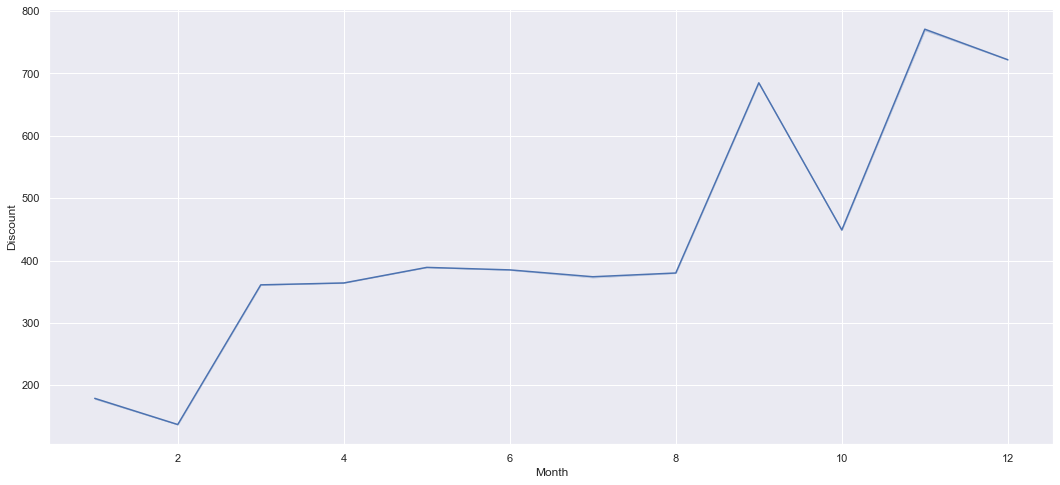

In [64]:
sns.lineplot(data=df, x='Month', y='Discount', ci=True, estimator=np.count_nonzero)

In [65]:
df.pivot_table(df, columns=df['Month'], index='Discount', aggfunc={'Sales': 'count'})

Sales                                                          \
Month        1      2      3      4      5      6      7      8      9    
Discount                                                                  
0.00      202.0  163.0  335.0  304.0  346.0  332.0  336.0  326.0  698.0   
0.10        4.0    2.0    6.0    6.0    4.0    7.0    7.0    4.0   19.0   
0.15        2.0    1.0    2.0    6.0    2.0    6.0    4.0    3.0    7.0   
0.20      114.0   92.0  246.0  259.0  270.0  269.0  261.0  287.0  478.0   
0.30        7.0    6.0   24.0   14.0   22.0   16.0   20.0   12.0   28.0   
0.32        1.0    1.0    5.0    1.0    2.0    2.0    NaN    2.0    3.0   
0.40       14.0    5.0   20.0   13.0   10.0   12.0   17.0   13.0   25.0   
0.45        NaN    NaN    NaN    3.0    1.0    NaN    NaN    2.0    1.0   
0.50        5.0    2.0    6.0    2.0    3.0    7.0    5.0    5.0    8.0   
0.60        4.0    7.0    6.0    6.0   14.0   12.0    9.0    8.0   12.0   
0.70       17.0   10.0   24.0   32.0   35.0   28.0   29.0   22.0   67.0   
0.80       11.0   11.0   22.0   22.0   26.0   26.0   22.0   22.0   37.0   

                               
Month        10     11     12  
Discount                       
0.00      370.0  700.0  686.0  
0.10        7.0   16.0   12.0  
0.15        6.0    7.0    6.0  
0.20      323.0  535.0  523.0  
0.30       16.0   33.0   29.0  
0.32        1.0    6.0    3.0  
0.40       18.0   35.0   24.0  
0.45        1.0    2.0    1.0  
0.50        6.0    7.0   10.0  
0.60       11.0   23.0   26.0  
0.70       34.0   64.0   56.0  
0.80       26.0   43.0   32.0

### what's the effect of Discount on Sales, Profit, Quantity, Region and Segment ?

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

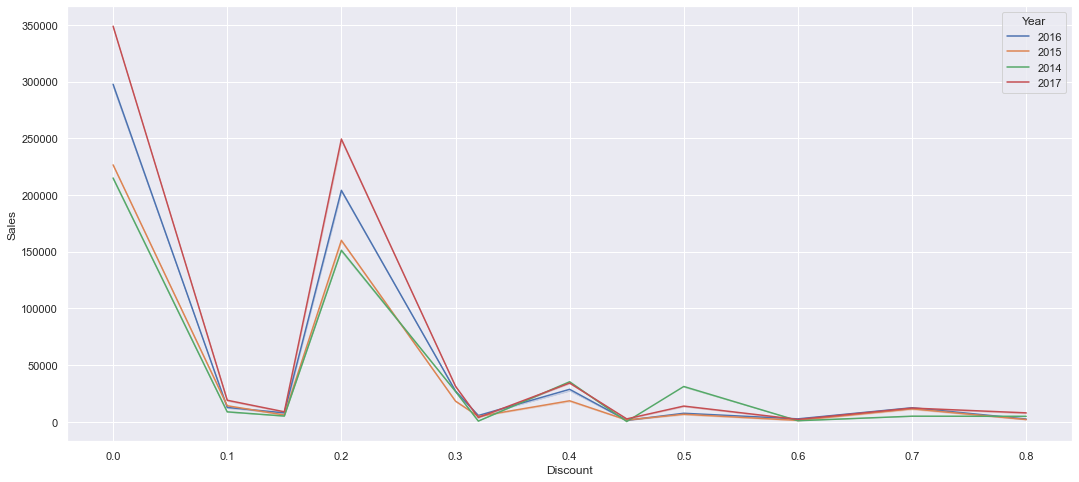

In [66]:
sns.lineplot(data=df, x='Discount', y='Sales', ci=True, hue='Year', estimator=sum)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

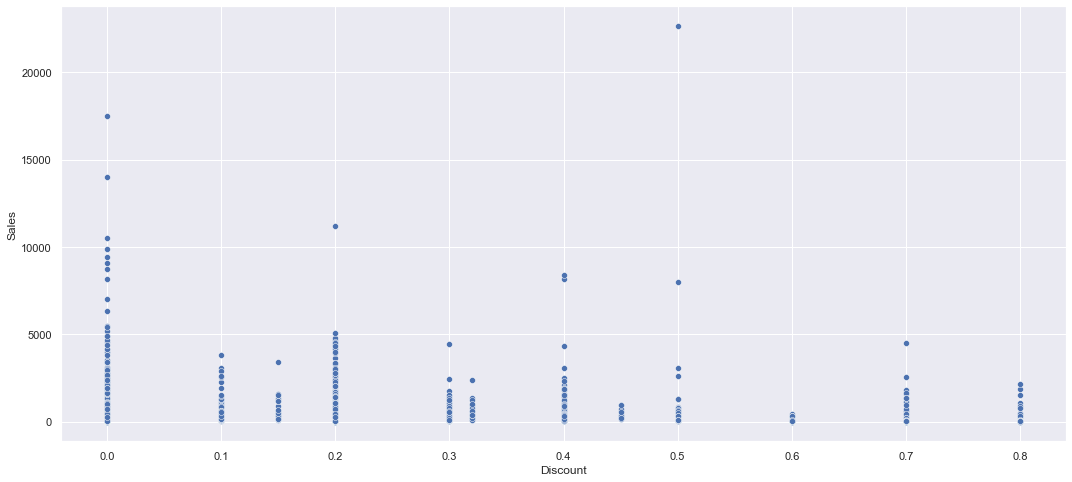

In [67]:
sns.scatterplot(data=df, x='Discount', y='Sales')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

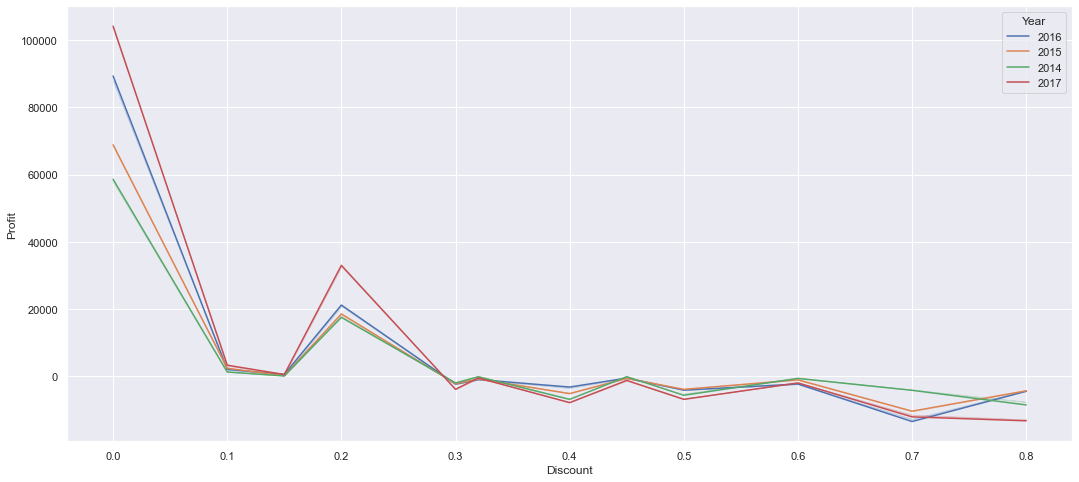

In [68]:
sns.lineplot(data=df, x='Discount', y='Profit', ci=True, hue='Year', estimator=sum)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

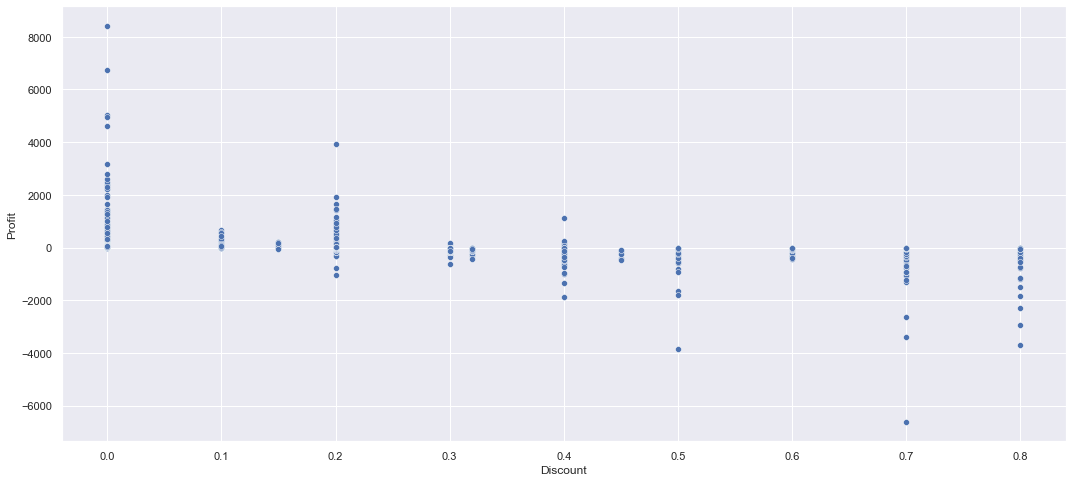

In [69]:
sns.scatterplot(data=df, x='Discount', y='Profit')

In [70]:
df.pivot_table(df, index='Discount', columns='Quantity', aggfunc={'Sales' : 'count'})

Sales                                                            \
Quantity     1       2       3      4      5      6      7      8      9    
Discount                                                                    
0.00      440.0  1123.0  1147.0  579.0  618.0  262.0  295.0  120.0  134.0   
0.10        9.0    29.0    17.0    7.0   11.0    7.0    5.0    1.0    3.0   
0.15        4.0    16.0    12.0    3.0    8.0    2.0    2.0    2.0    1.0   
0.20      324.0   911.0   917.0  433.0  405.0  216.0  210.0   94.0   85.0   
0.30       17.0    61.0    48.0   27.0   35.0   14.0   14.0    4.0    5.0   
0.32        3.0     6.0     6.0    4.0    2.0    1.0    3.0    NaN    1.0   
0.40       20.0    52.0    53.0   23.0   18.0    8.0   12.0    8.0    6.0   
0.45        1.0     1.0     3.0    2.0    1.0    1.0    2.0    NaN    NaN   
0.50        9.0    10.0    16.0    8.0   13.0    5.0    4.0    NaN    1.0   
0.60       10.0    34.0    38.0   11.0   27.0    6.0    6.0    2.0    4.0   
0.70       34.0    96.0    88.0   52.0   51.0   32.0   35.0   15.0    8.0   
0.80       28.0    63.0    64.0   42.0   41.0   18.0   18.0   11.0   10.0   

                                        
Quantity    10    11    12    13    14  
Discount                                
0.00      24.0  19.0  12.0  12.0  13.0  
0.10       1.0   2.0   NaN   NaN   2.0  
0.15       1.0   NaN   NaN   1.0   NaN  
0.20      20.0  12.0   9.0  11.0  10.0  
0.30       1.0   NaN   NaN   NaN   1.0  
0.32       1.0   NaN   NaN   NaN   NaN  
0.40       2.0   NaN   2.0   1.0   1.0  
0.45       NaN   NaN   NaN   NaN   NaN  
0.50       NaN   NaN   NaN   NaN   NaN  
0.60       NaN   NaN   NaN   NaN   NaN  
0.70       4.0   1.0   NaN   1.0   1.0  
0.80       3.0   NaN   NaN   1.0   1.0

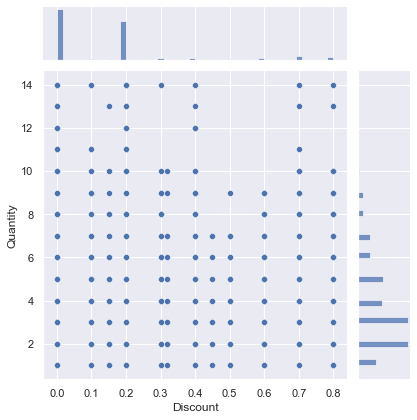

In [71]:
sns.jointplot(data=df, x='Discount', y='Quantity')

<AxesSubplot:xlabel='Discount', ylabel='count'>

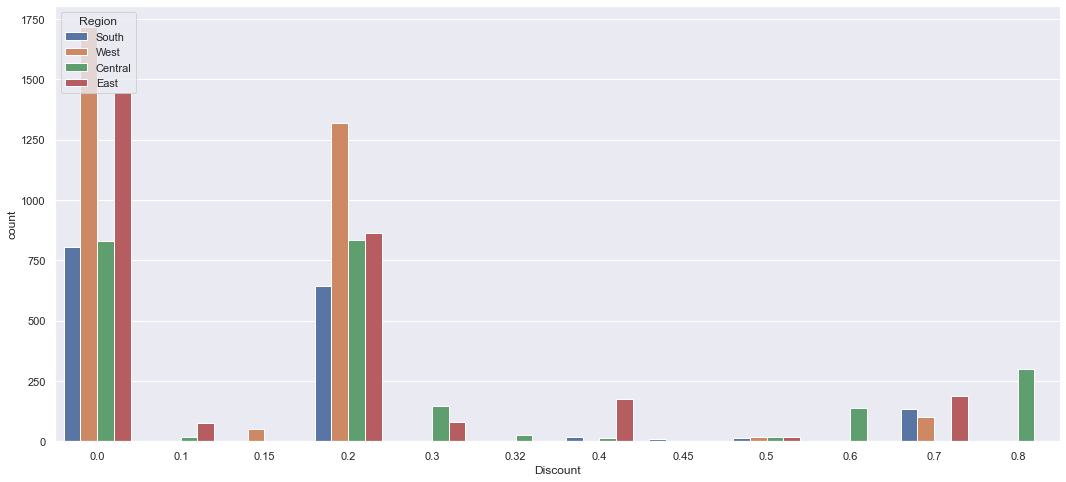

In [72]:
sns.countplot(data=df, x='Discount', hue='Region')

<AxesSubplot:xlabel='Discount', ylabel='count'>

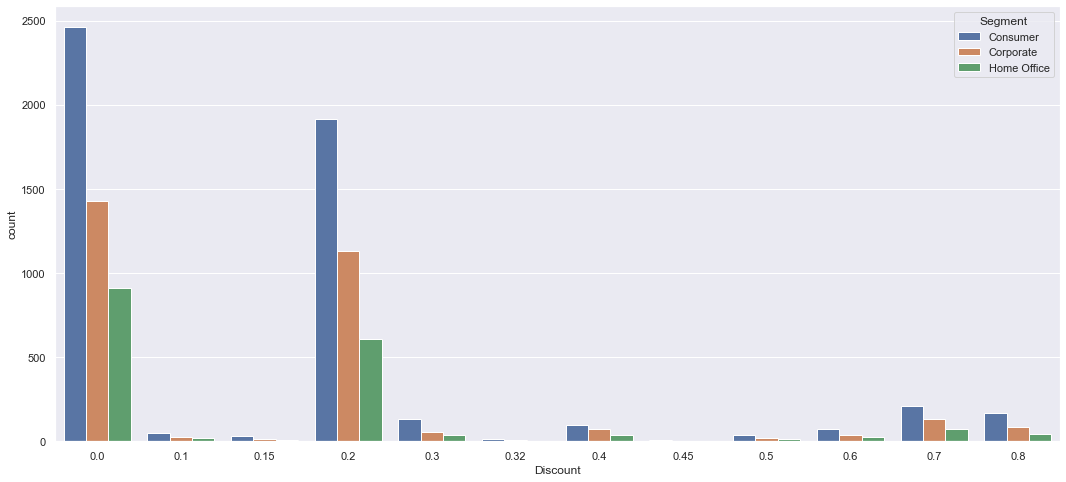

In [73]:
sns.countplot(data=df, x='Discount', hue='Segment')

### Which Region, State and City should be target or avoid, and why ?

<AxesSubplot:xlabel='Region', ylabel='Sales'>

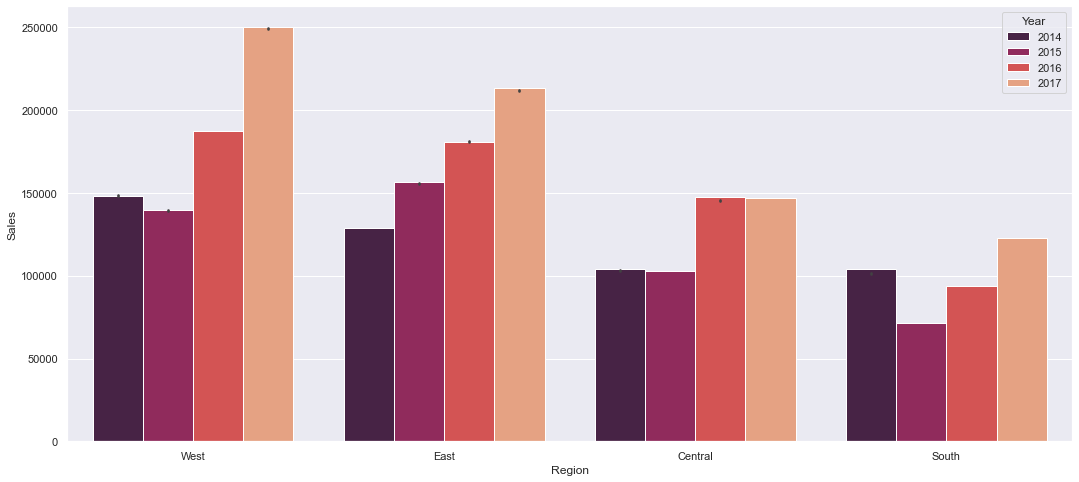

In [74]:
sns.barplot(x=df['Region'], y=df['Sales'], order=pd.value_counts(df['Region']).index,hue=df['Year'], ci=True, estimator=sum, palette='rocket', hue_order=['2014', '2015', '2016', '2017'])

<AxesSubplot:xlabel='Region', ylabel='Profit'>

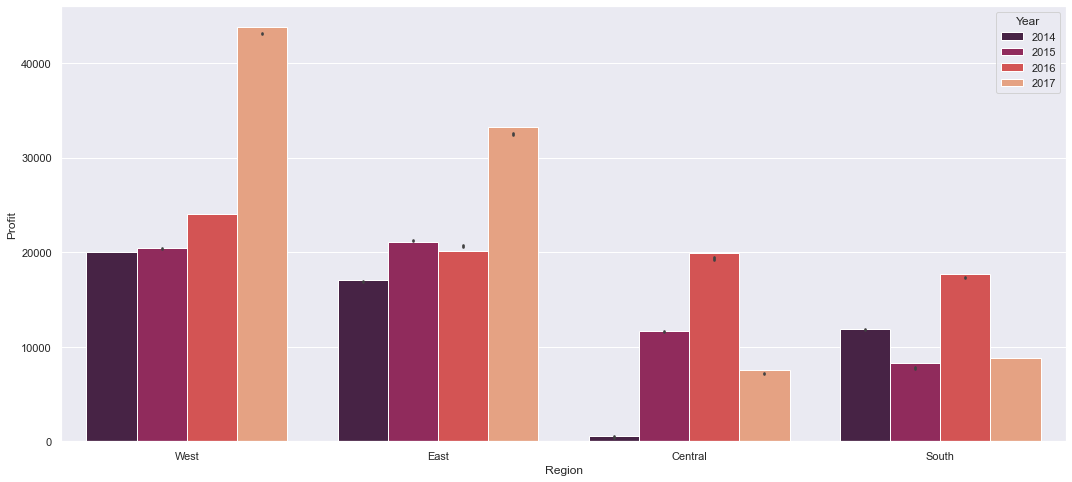

In [75]:
sns.barplot(x=df['Region'], y=df['Profit'], order=pd.value_counts(df['Region']).index,hue=df['Year'], ci=True, estimator=sum, palette='rocket', hue_order=['2014', '2015', '2016', '2017'])

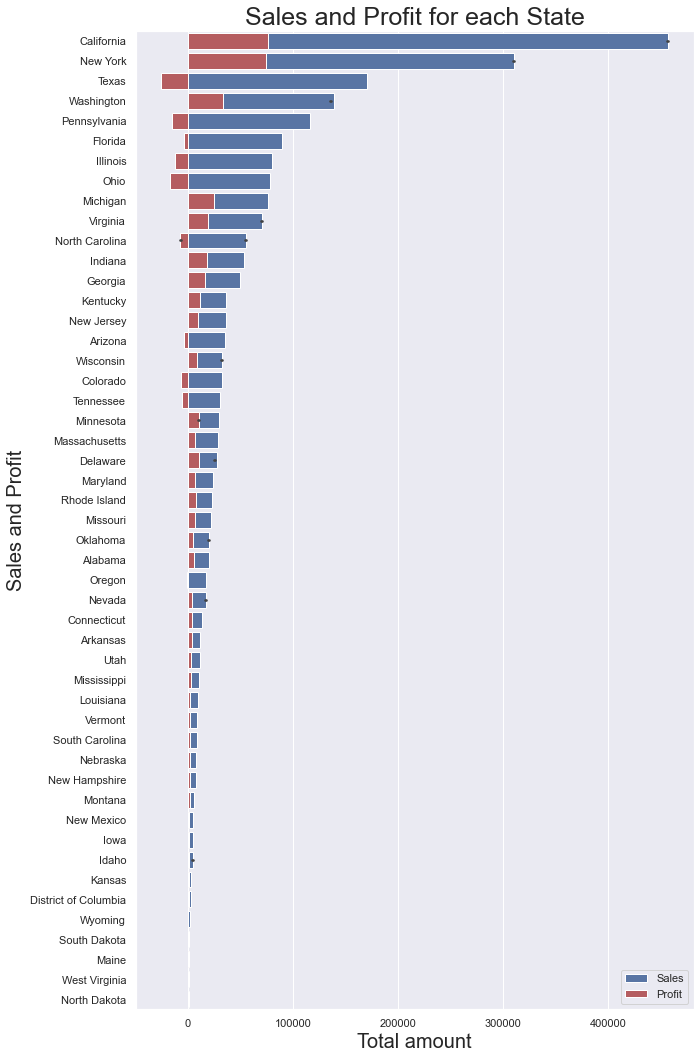

In [103]:
plt.figure(figsize=(10,18))
sns.barplot(x=df['Sales'], y=df['State'], order=df.groupby('State').sum()['Sales'].sort_values(ascending=False).index, ci=True, estimator=sum, color='b', label= 'Sales')
sns.barplot(x=df['Profit'], y=df['State'],order=df.groupby('State').sum()['Sales'].sort_values(ascending=False).index, ci=True, estimator=sum, color='r', label= 'Profit')
plt.title('Sales and Profit for each State', fontdict={'fontsize' : 25})
plt.xlabel('Total amount', fontdict={'fontsize' : 20})
plt.ylabel('Sales and Profit', fontdict={'fontsize' : 20})
plt.legend()

Text(0, 0.5, 'Sales')

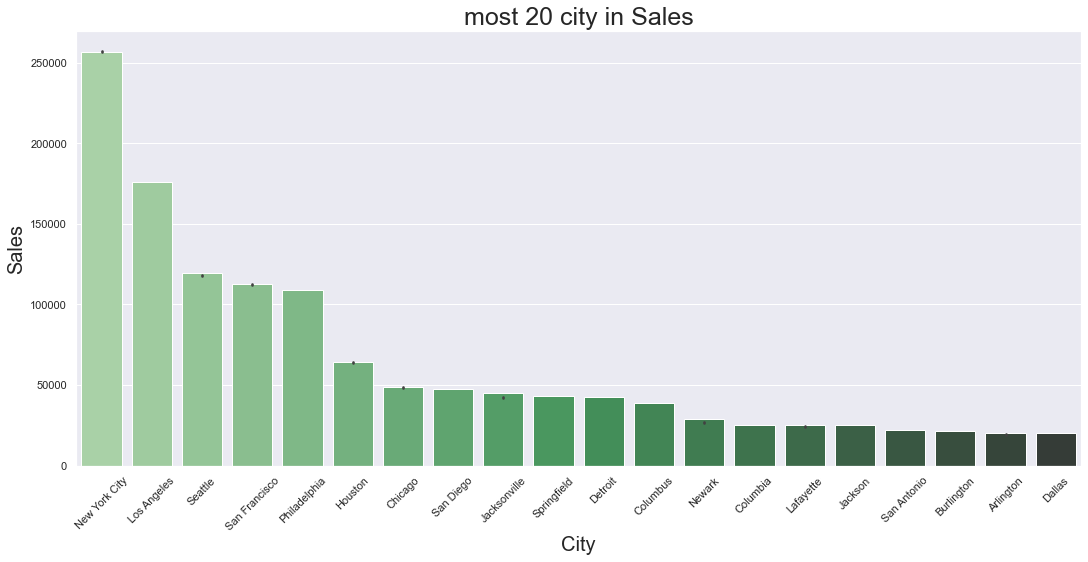

In [104]:
plt.xticks(rotation= 45)
sns.barplot(x=df['City'], y=df['Sales'], order=df.groupby('City').sum()['Sales'].sort_values(ascending=False)[:20].index, ci=True, palette='Greens_d', estimator=sum)
plt.title('most 20 city in Sales', fontdict={'fontsize' : 25})
plt.xlabel('City', fontdict={'fontsize' : 20})
plt.ylabel('Sales', fontdict={'fontsize' : 20})

<AxesSubplot:xlabel='City', ylabel='Sales'>

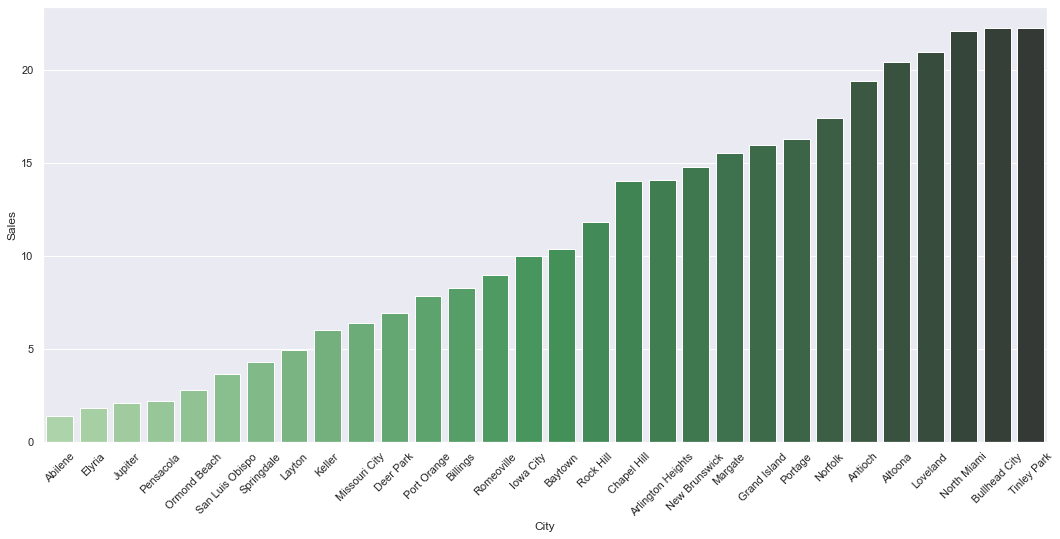

In [78]:
plt.xticks(rotation= 45)
sns.barplot(x=df['City'], y=df['Sales'], order=df.groupby('City').sum()['Sales'].sort_values()[:30].index, ci=True, palette='Greens_d', estimator=sum)

<AxesSubplot:xlabel='City', ylabel='Profit'>

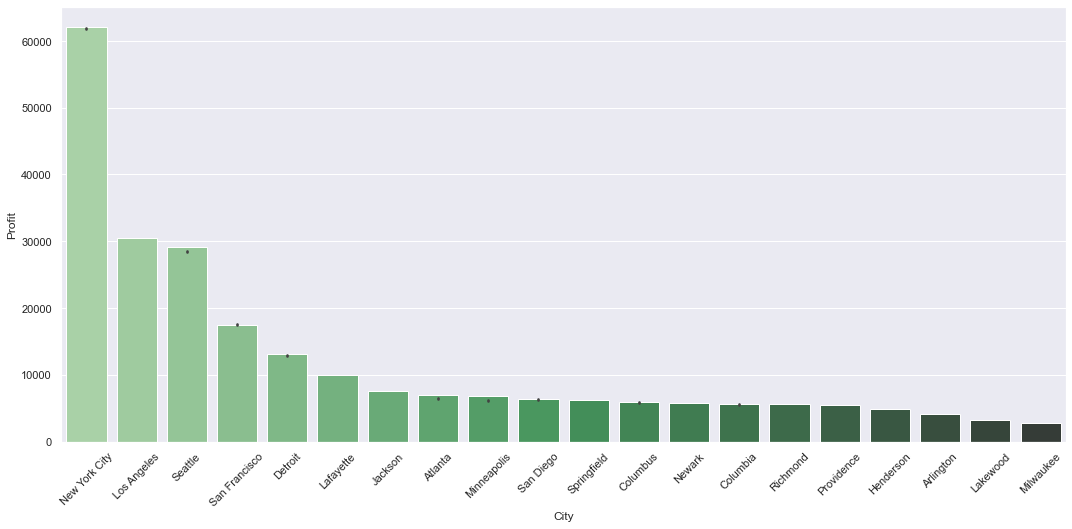

In [79]:
plt.xticks(rotation= 45)
sns.barplot(x=df['City'], y=df['Profit'], order=df.groupby('City').sum()['Profit'].sort_values(ascending=False)[:20].index, ci=True, palette='Greens_d', estimator=sum)

<AxesSubplot:xlabel='City', ylabel='Profit'>

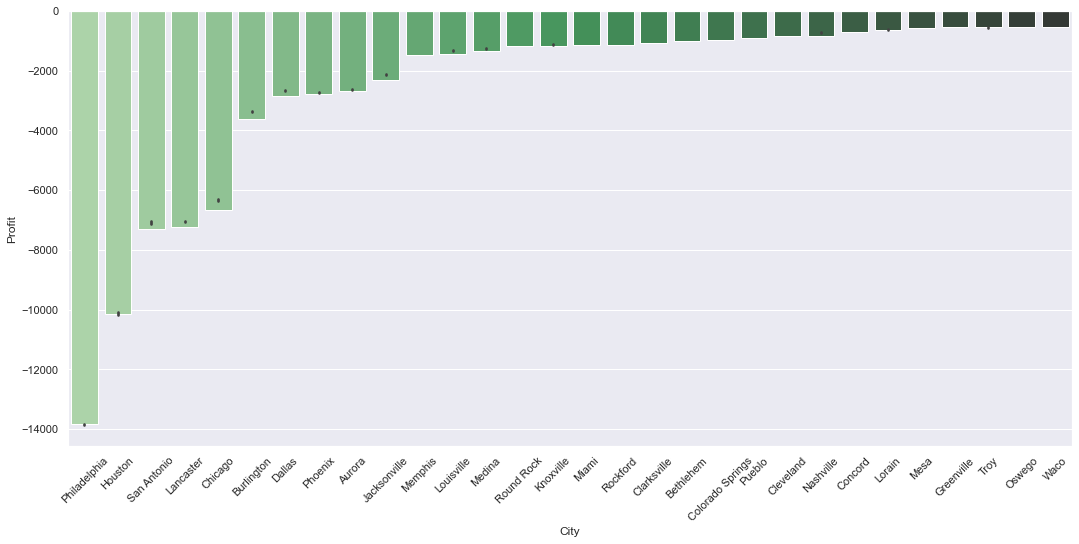

In [80]:
plt.xticks(rotation= 45)
sns.barplot(x=df['City'], y=df['Profit'], order=df.groupby('City').sum()['Profit'].sort_values()[:30].index, ci=True, palette='Greens_d', estimator=sum)

### top 20 products in sales and profit ?

Text(0, 0.5, 'Product Name')

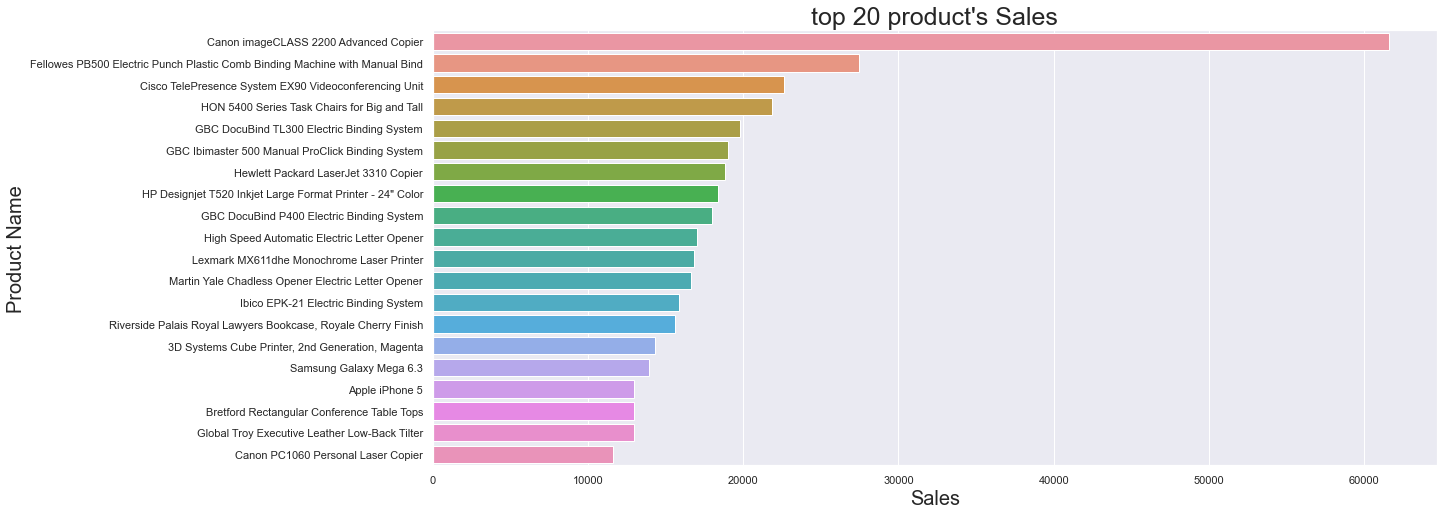

In [81]:
top_20 = df.groupby('Product Name').sum()['Sales'].sort_values(ascending=False)[:20].index
values = df.groupby('Product Name').sum()['Sales'].sort_values(ascending=False)[:20].values
sns.barplot(y=top_20, x=values, estimator=sum)

plt.title("top 20 product's Sales", fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Sales', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Product Name', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

Text(0, 0.5, 'Product Name')

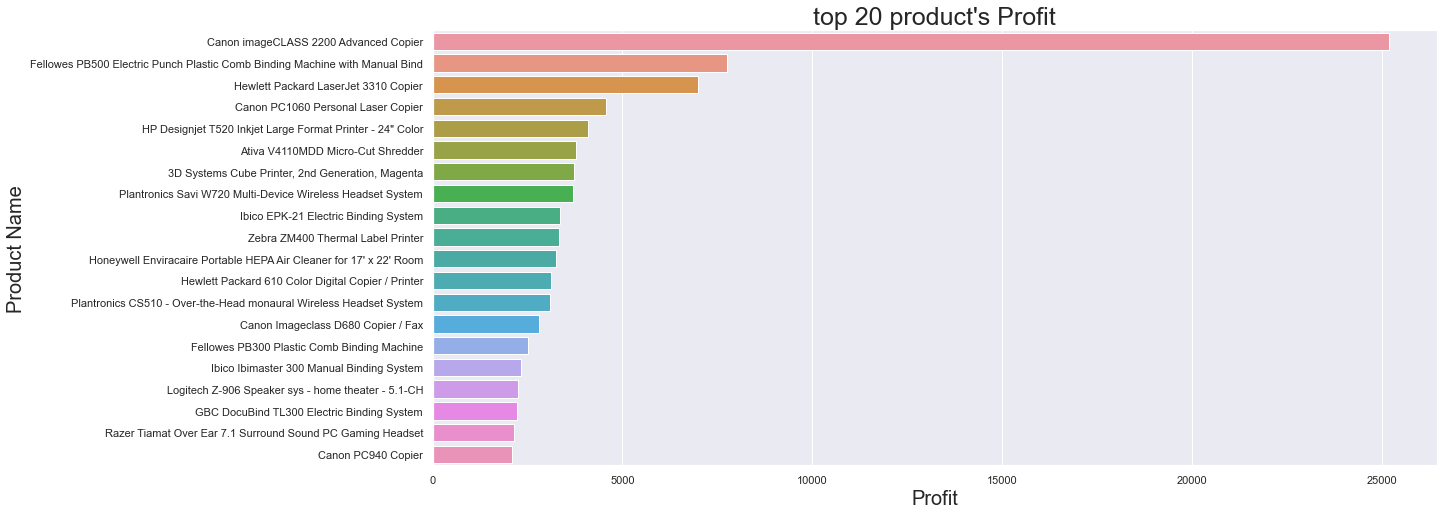

In [82]:
top_20 = df.groupby('Product Name').sum()['Profit'].sort_values(ascending=False)[:20].index
values = df.groupby('Product Name').sum()['Profit'].sort_values(ascending=False)[:20].values
sns.barplot(y=top_20, x=values, estimator=sum)

plt.title("top 20 product's Profit", fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Profit', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Product Name', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

Text(0, 0.5, 'Product Name')

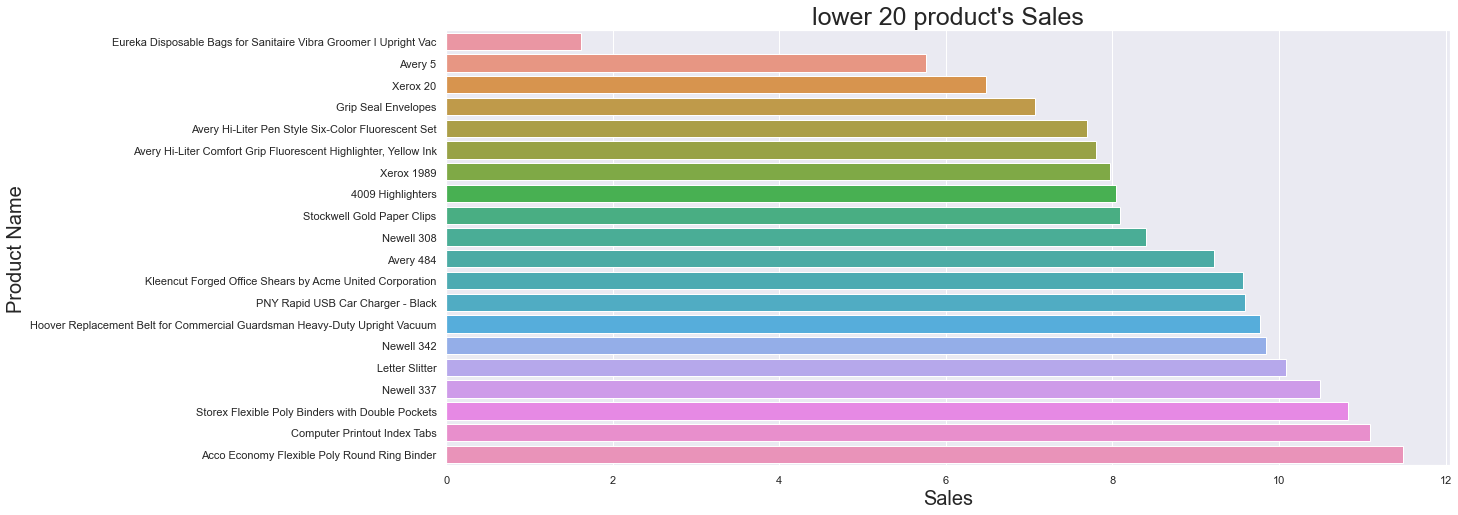

In [83]:
top_20 = df.groupby('Product Name').sum()['Sales'].sort_values()[:20].index
values = df.groupby('Product Name').sum()['Sales'].sort_values()[:20].values
sns.barplot(y=top_20, x=values, estimator=sum)

plt.title("lower 20 product's Sales", fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Sales', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Product Name', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

Text(0, 0.5, 'Product Name')

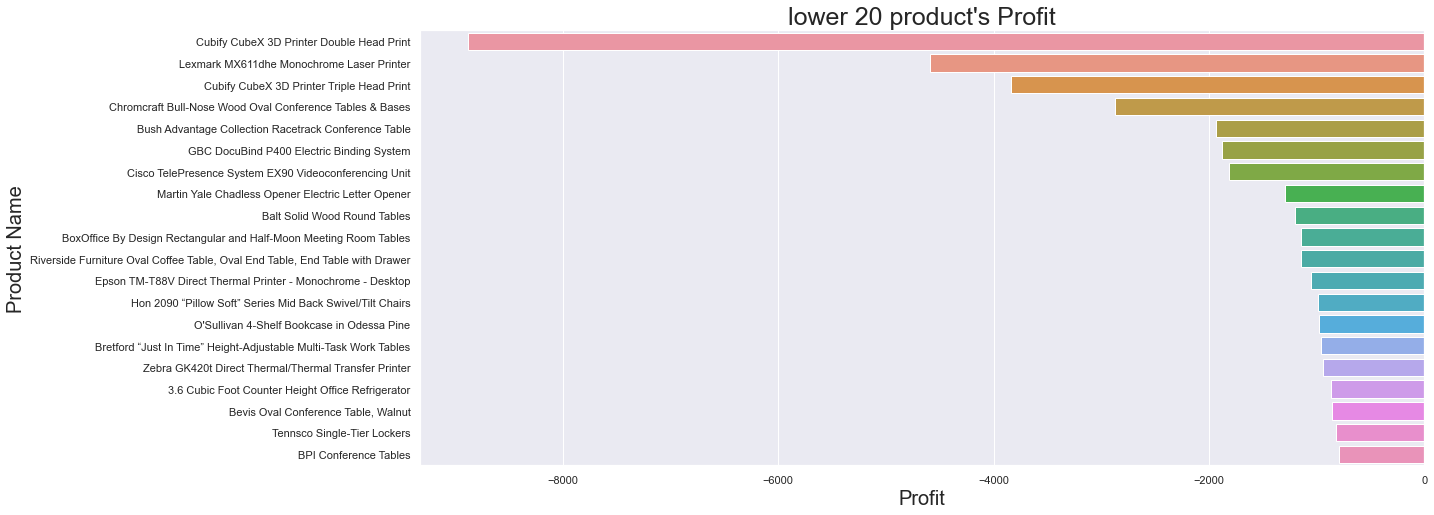

In [84]:
top_20 = df.groupby('Product Name').sum()['Profit'].sort_values()[:20].index
values = df.groupby('Product Name').sum()['Profit'].sort_values()[:20].values
sns.barplot(y=top_20, x=values, estimator=sum)

plt.title("lower 20 product's Profit", fontdict={'fontsize' : 25, 'fontweight' : 'medium'})
plt.xlabel('Profit', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})
plt.ylabel('Product Name', fontdict={'fontsize' : 20, 'fontweight' : 'medium'})

### which Customer should be target or avoid ?

<AxesSubplot:xlabel='Segment', ylabel='count'>

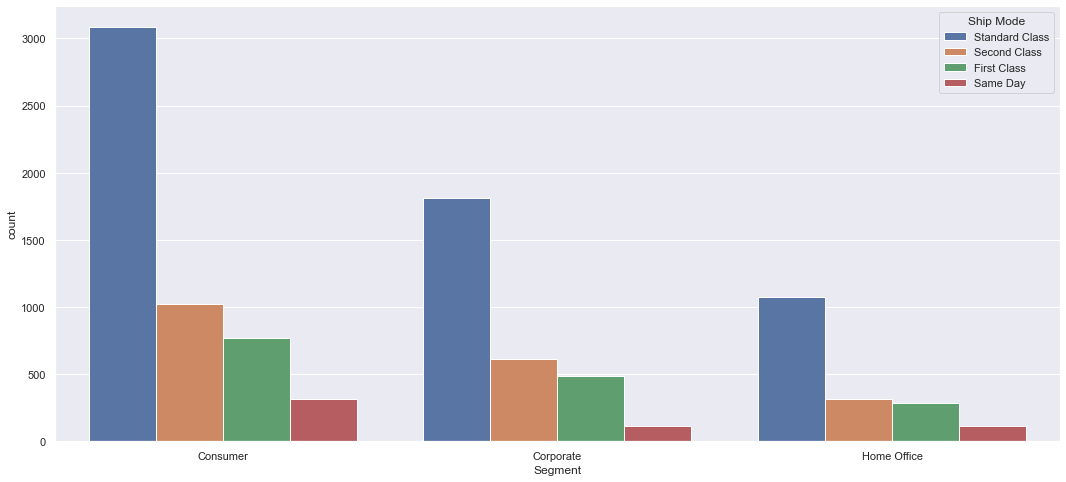

In [85]:
sns.countplot(data=df, x='Segment', hue='Ship Mode', hue_order=['Standard Class', 'Second Class', 'First Class', 'Same Day'])

In [86]:
pre_days = (df['Ship Date'].dt.date - df['Order Date'].dt.date).dt.days

<AxesSubplot:ylabel='count'>

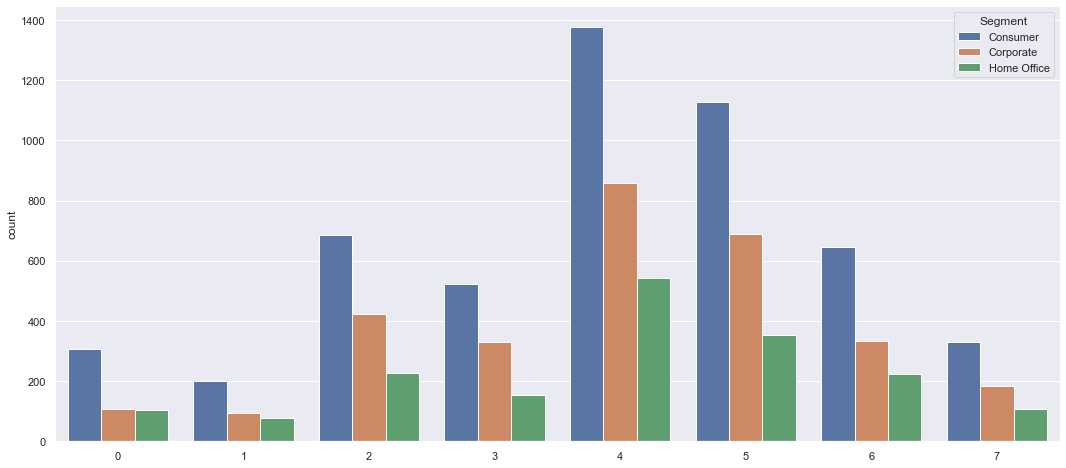

In [87]:
sns.countplot(x=pre_days, hue=df['Segment'])

<AxesSubplot:ylabel='count'>

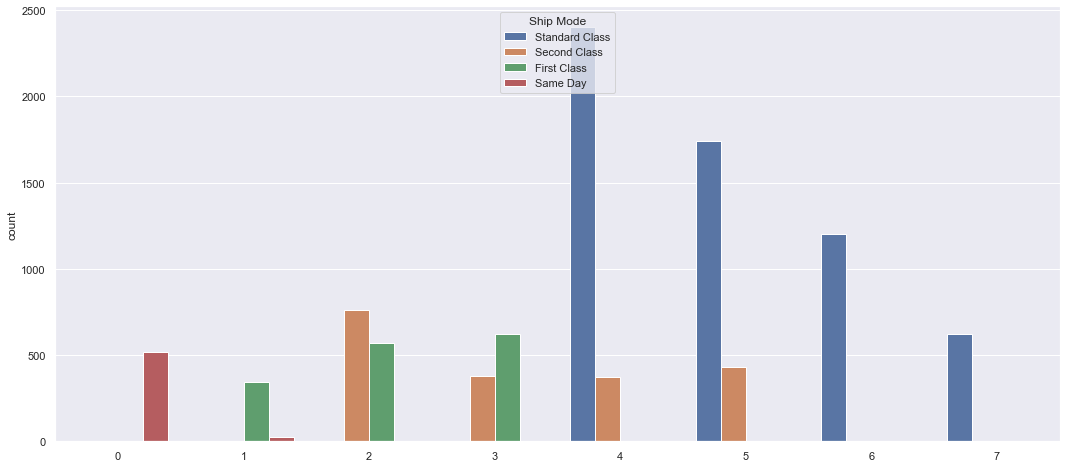

In [88]:
sns.countplot(x=pre_days, hue=df['Ship Mode'], hue_order=['Standard Class', 'Second Class', 'First Class', 'Same Day'])

## prepairing data for machine learning model

In [89]:
ML_data = df
ML_data

,Year,Month,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Total before Discount,Sales,Quantity,Discount,Profit
0,2016,11,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,261.9600,2,0.00,41.9136
1,2016,11,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,731.9400,3,0.00,219.5820
2,2016,6,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,14.6200,2,0.00,6.8714
3,2015,10,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1741.05,957.5775,5,0.45,-383.0310
4,2015,10,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,27.96,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014,1,CA-2014-110422,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,31.56,25.2480,3,0.20,4.1028
9990,2017,2,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,91.9600,2,0.00,15.6332
9991,2017,2,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,323.22,258.5760,2,0.20,19.3932
9992,2017,2,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,29.6000,4,0.00,13.3200


In [90]:
ML_data.drop(['Year', 'Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Product Name'], axis=1, inplace=True)

In [91]:
ML_data = pd.get_dummies(ML_data, columns=['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category'], drop_first=True)

In [92]:
ML_data

,Month,Total before Discount,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,11,261.96,261.9600,2,0.00,41.9136,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,731.94,731.9400,3,0.00,219.5820,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,14.62,14.6200,2,0.00,6.8714,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,10,1741.05,957.5775,5,0.45,-383.0310,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,10,27.96,22.3680,2,0.20,2.5164,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1,31.56,25.2480,3,0.20,4.1028,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,2,91.96,91.9600,2,0.00,15.6332,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9991,2,323.22,258.5760,2,0.20,19.3932,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9992,2,29.60,29.6000,4,0.00,13.3200,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
x = ML_data.drop('Profit', axis=1)
y = ML_data['Profit']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, shuffle= True)

In [95]:
scalar = RobustScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [96]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,599,600,601,602,603,604,605,606,607,608
0,0.333333,0.352993,0.326450,-0.333333,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.666667,-0.161341,-0.135262,-0.666667,-1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,-0.102138,-0.107067,0.333333,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.166667,2.133428,1.677546,0.000000,0.6,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,-0.252945,-0.250712,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,0.000000,-0.200187,-0.181514,0.666667,-1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7991,-0.500000,-0.182853,-0.160876,-0.333333,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7992,0.333333,3.083959,3.728713,0.666667,-1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,-0.166667,0.142940,0.227025,0.666667,-1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
